##  Lung Caner Analysis

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.svm import SVR,SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


## Loading Data Sets

In [2]:
df=pd.read_csv(r'Data_Sets/survey lung cancer.csv')

In [3]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

## CONVERTING 2 and 1 To Yes No

In [5]:
df.rename(columns={'CHRONIC DISEASE':'CHORNIC_DISEASE','FATIGUE':'FATIGUES'},inplace=True)


In [6]:
df.rename(columns={'ALCOHOL CONSUMING':'ALCOHOL_CONSUMING','SHORTNESS OF BREATH':'SHORTNESS_OF_BREATH','SWALLOWING SWALLOWING DIFFICULTY':'SWALLOWING_DIFFICULTY','CHEST PAIN':'CHEST_PAIN'},inplace=True)

In [7]:
change_vol=['SMOKING',
 'YELLOW_FINGERS',
 'ANXIETY',
 'PEER_PRESSURE',
 'CHORNIC_DISEASE',
 'FATIGUE ',
 'ALLERGY ',
 'WHEEZING',
 'ALCOHOL_CONSUMING',
 'COUGHING',
 'SHORTNESS_OF_BREATH',
 'SWALLOWING DIFFICULTY',
 'CHEST_PAIN',]

for col in change_vol:
    df[change_vol]=df[change_vol].replace({2:'YES',1:'NO'})



In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    object
 3   YELLOW_FINGERS         309 non-null    object
 4   ANXIETY                309 non-null    object
 5   PEER_PRESSURE          309 non-null    object
 6   CHORNIC_DISEASE        309 non-null    object
 7   FATIGUE                309 non-null    object
 8   ALLERGY                309 non-null    object
 9   WHEEZING               309 non-null    object
 10  ALCOHOL_CONSUMING      309 non-null    object
 11  COUGHING               309 non-null    object
 12  SHORTNESS_OF_BREATH    309 non-null    object
 13  SWALLOWING DIFFICULTY  309 non-null    object
 14  CHEST_PAIN             309 non-null    object
 15  LUNG_CANCER            

In [9]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHORNIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,69,NO,YES,YES,NO,NO,YES,NO,YES,YES,YES,YES,YES,YES,YES
1,M,74,YES,NO,NO,NO,YES,YES,YES,NO,NO,NO,YES,YES,YES,YES
2,F,59,NO,NO,NO,YES,NO,YES,NO,YES,NO,YES,YES,NO,YES,NO
3,M,63,YES,YES,YES,NO,NO,NO,NO,NO,YES,NO,NO,YES,YES,NO
4,F,63,NO,YES,NO,NO,NO,NO,NO,YES,NO,YES,YES,NO,NO,NO


# Count Plot Of All Features

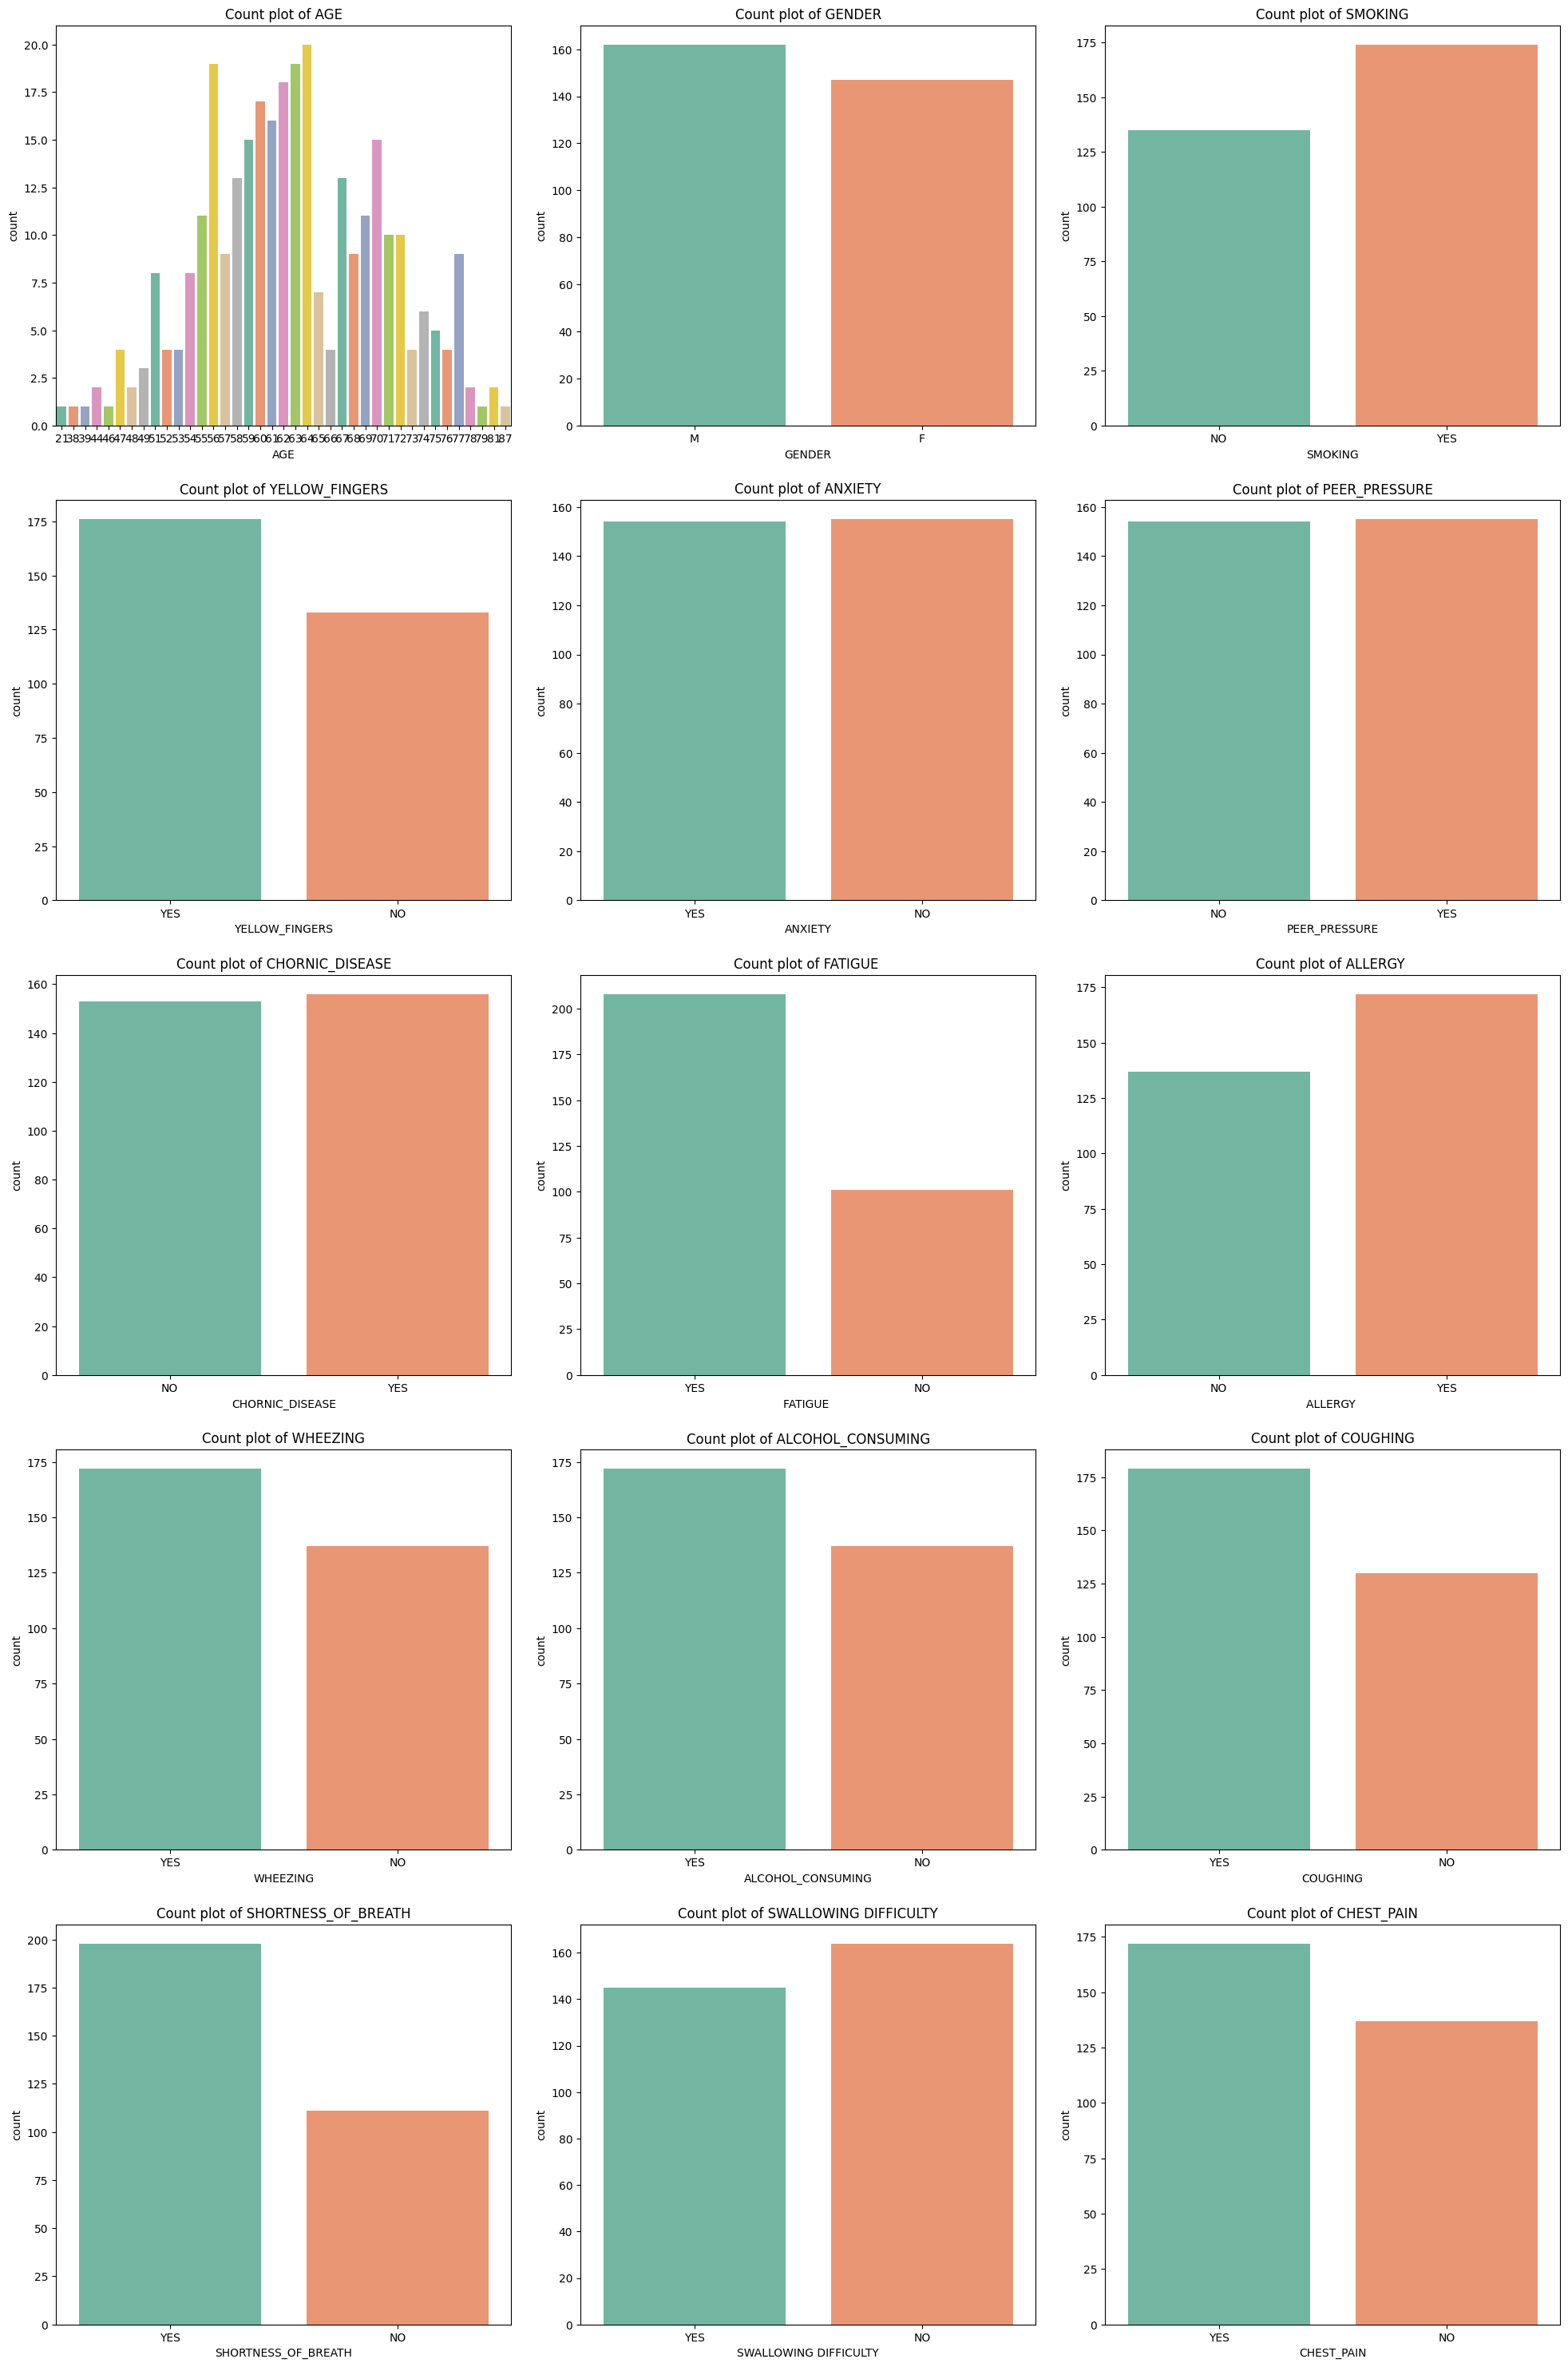

In [10]:
change_vol=['AGE',
 'GENDER',
 'SMOKING',
 'YELLOW_FINGERS',
 'ANXIETY',
 'PEER_PRESSURE',
 'CHORNIC_DISEASE',
 'FATIGUE ',
 'ALLERGY ',
 'WHEEZING',
 'ALCOHOL_CONSUMING',
 'COUGHING',
 'SHORTNESS_OF_BREATH',
 'SWALLOWING DIFFICULTY',
 'CHEST_PAIN',]

fig , ax = plt.subplots(5,3,figsize=(20,30))
ax = ax.flatten()
for i,col in enumerate(change_vol):
    sns.countplot(df, x=col, palette='Set2', ax=ax[i],hue=col,legend=False)
    ax[i].set_title(f"Count plot of {col}")
plt.tight_layout(pad=2.0)
plt.show()

# Box plot fo age to check Outliers

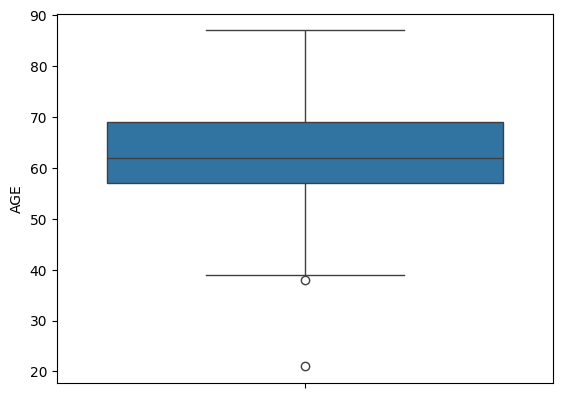

In [11]:
sns.boxplot(y=df['AGE'])
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    object
 3   YELLOW_FINGERS         309 non-null    object
 4   ANXIETY                309 non-null    object
 5   PEER_PRESSURE          309 non-null    object
 6   CHORNIC_DISEASE        309 non-null    object
 7   FATIGUE                309 non-null    object
 8   ALLERGY                309 non-null    object
 9   WHEEZING               309 non-null    object
 10  ALCOHOL_CONSUMING      309 non-null    object
 11  COUGHING               309 non-null    object
 12  SHORTNESS_OF_BREATH    309 non-null    object
 13  SWALLOWING DIFFICULTY  309 non-null    object
 14  CHEST_PAIN             309 non-null    object
 15  LUNG_CANCER            

In [13]:
X=df.drop("LUNG_CANCER",axis=1)
y=df["LUNG_CANCER"]


In [14]:
df.shape

(309, 16)

## Using Different Alg

In [15]:
categorical_cols=['GENDER','SMOKING','YELLOW_FINGERS','ANXIETY','PEER_PRESSURE','CHORNIC_DISEASE','FATIGUE ','ALLERGY ','WHEEZING','ALCOHOL_CONSUMING','COUGHING','SHORTNESS_OF_BREATH','SWALLOWING DIFFICULTY','CHEST_PAIN']
numerical_cols=['AGE']

In [16]:
label_encoder = LabelEncoder()
y_encoded=label_encoder.fit_transform(y)

preprocessor=ColumnTransformer(
    transformers=[
        ("num",StandardScaler(),numerical_cols),
        ("cat",OneHotEncoder(drop="first"),categorical_cols)
    ]
)

models={
    "Logistic_Regression":LogisticRegression(),
    "Decision_Tree":DecisionTreeClassifier(random_state=42),
    "Random_Forest":RandomForestClassifier(n_estimators=100,random_state=42),
    "KNN":KNeighborsClassifier(n_neighbors=3),
    "SVM":SVC(kernel="rbf")
}

X_train,X_test,y_train,y_test=train_test_split(
    X,y_encoded,test_size=0.2,random_state=42
)

os.makedirs("ML_model",exist_ok=True)

for name,model in models.items():
    pipe=Pipeline(steps=[("preprocessor",preprocessor),
                         ("regressor",model)])
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)

    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Recall:",recall_score(y_test,y_pred))
    print("Precission:",precision_score(y_test,y_pred))
    print("f1_score:",f1_score(y_test,y_pred))
    
     # Save model
    joblib.dump(pipe, f"ML_Model/{name}_model.pkl")
    print(f"   Saved: ML_Model/{name}_model.pkl")


nb_pipe = Pipeline(steps=[("preprocessor", preprocessor),
                          ("classifier", GaussianNB())])
 
nb_pipe.fit(X_train, y_train)  
nb_pred = nb_pipe.predict(X_test)
nb_accuracy = (nb_pred == y_test).mean()

print(f"\nNaive Bayes Results:")
print("  Accuracy:", nb_accuracy)

# Save Naive Bayes model separately
joblib.dump(nb_pipe, "ML_Model/Naive_Bayes_model.pkl")
print("  Saved: ML_Model/Naive_Bayes_model.pkl")


Logistic_Regression Results:
Accuracy: 0.967741935483871
Recall: 0.9833333333333333
Precission: 0.9833333333333333
f1_score: 0.9833333333333333
   Saved: ML_Model/Logistic_Regression_model.pkl

Decision_Tree Results:
Accuracy: 0.967741935483871
Recall: 0.9833333333333333
Precission: 0.9833333333333333
f1_score: 0.9833333333333333
   Saved: ML_Model/Decision_Tree_model.pkl

Random_Forest Results:
Accuracy: 0.967741935483871
Recall: 0.9833333333333333
Precission: 0.9833333333333333
f1_score: 0.9833333333333333
   Saved: ML_Model/Random_Forest_model.pkl

KNN Results:
Accuracy: 0.967741935483871
Recall: 0.9833333333333333
Precission: 0.9833333333333333
f1_score: 0.9833333333333333
   Saved: ML_Model/KNN_model.pkl

SVM Results:
Accuracy: 0.967741935483871
Recall: 0.9833333333333333
Precission: 0.9833333333333333
f1_score: 0.9833333333333333
   Saved: ML_Model/SVM_model.pkl

Naive Bayes Results:
  Accuracy: 0.9516129032258065
  Saved: ML_Model/Naive_Bayes_model.pkl
